<a href="https://colab.research.google.com/github/Suhas-S63/Machine_Learning_Lab_T1/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_f = pd.read_csv('/content/drive/MyDrive/employee_data (1) 2.csv')
data_f

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [3]:
data_f.shape

(14249, 10)

In [4]:
data_f.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [5]:
data = data_f.dropna(subset = ['department', 'tenure'])
data

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0


In [6]:
data.isnull().sum()

avg_monthly_hrs          0
department               0
filed_complaint      11421
last_evaluation       1284
n_projects               0
recently_promoted    13074
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [7]:
data['filed_complaint'] = data['filed_complaint'].fillna(0)
data['last_evaluation'] = data['last_evaluation'].fillna(data['last_evaluation'].mean())
data['recently_promoted'] = data['recently_promoted'].fillna(0)

<ipython-input-7-ccade8517273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filed_complaint'] = data['filed_complaint'].fillna(0)
<ipython-input-7-ccade8517273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_evaluation'] = data['last_evaluation'].fillna(data['last_evaluation'].mean())
<ipython-input-7-ccade8517273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [8]:
data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

Text(0.5, 1.0, 'Tenure Distribution')

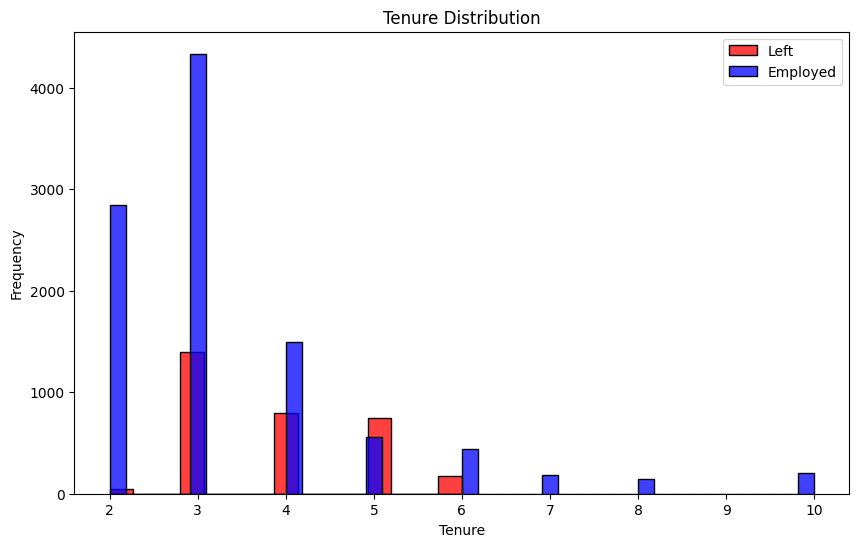

In [9]:
#Visualising the trend for Tenure and Employment Status
#Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data[data['status'] == 'Left']['tenure'],color = 'red', label = 'Left')
sns.histplot(data[data['status'] == 'Employed']['tenure'],color = 'blue', label = 'Employed')
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title("Tenure Distribution")

<Axes: xlabel='status', ylabel='satisfaction'>

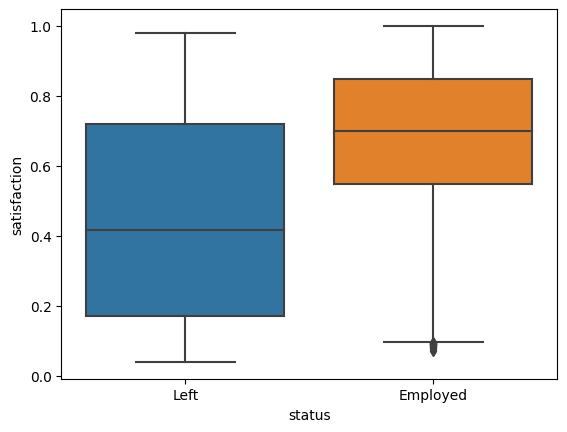

In [10]:
sns.boxplot( x='status',y = 'satisfaction',data = data)

Text(0.5, 1.0, 'Satisfaction vs Evaluation')

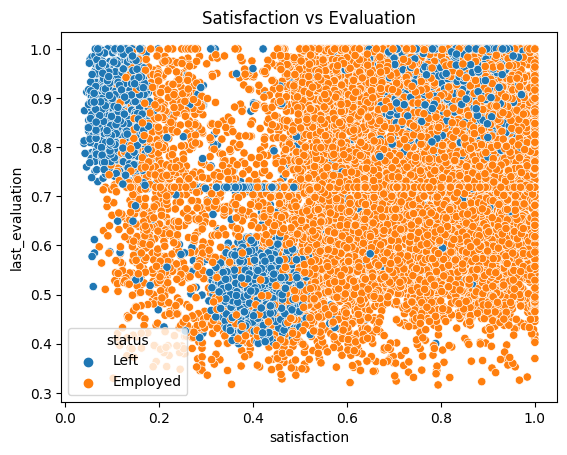

In [11]:
# Scatter plot of satisfaction vs evaluation
sns.scatterplot(x = 'satisfaction', y = 'last_evaluation', hue = 'status', data = data)
plt.title("Satisfaction vs Evaluation")

From the scatterplot graph we see that there is a correlation between employee satisfaction scores and their last evaluation scores for employees who left.

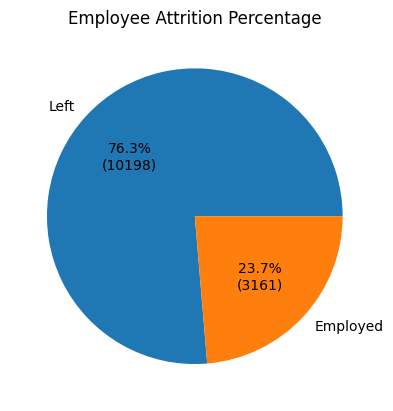

In [27]:
#Piechart for distibution of attrition
emp_values = data['status'].value_counts()
labels  = ['Left','Employed']
plt.pie(emp_values, labels = labels , autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(emp_values) / 100))
plt.title('Employee Attrition Percentage')
plt.show()

In [13]:
print(data)

       avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                  221  engineering              0.0         0.932868   
1                  232      support              0.0         0.718506   
2                  184        sales              0.0         0.788830   
3                  206        sales              0.0         0.575688   
4                  249        sales              0.0         0.845217   
...                ...          ...              ...              ...   
14243              272  engineering              0.0         0.815504   
14244              178           IT              0.0         0.735865   
14245              257        sales              0.0         0.638604   
14246              232      finance              1.0         0.847623   
14247              130           IT              0.0         0.757184   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0               4                0.0     low

In [ ]:
#To encode categrorical variables in department, salary and status columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['department'] = label_encoder.fit_transform(data['department'])
data['salary'] = label_encoder.fit_transform(data['salary'])
data['status'] = label_encoder.fit_transform(data['status'])

In [15]:
#Splitting the data for training and testing (Split is 80,20)
from sklearn.model_selection import train_test_split
X = data.drop(['status'], axis=1)
Y = data['status']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [16]:
#Training the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50)
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)
gini_tree.fit(X_train, Y_train)
entropy_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)

In [17]:
# Evaluate models
y_pred_gini = gini_tree.predict(X_test)
y_pred_entropy = entropy_tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Gini accuracy:', accuracy_score(Y_test, y_pred_gini))
print('Entropy accuracy:', accuracy_score(Y_test, y_pred_entropy))

print('Gini precision:', precision_score(Y_test, y_pred_gini))
print('Entropy precision:', precision_score(Y_test, y_pred_entropy))

print('Gini recall:', recall_score(Y_test, y_pred_gini))
print('Entropy recall:', recall_score(Y_test, y_pred_entropy))

print('Gini F1:', f1_score(Y_test, y_pred_gini))
print('Entropy F1:', f1_score(Y_test, y_pred_entropy))



Gini accuracy: 0.9588323353293413
Entropy accuracy: 0.9655688622754491
Gini precision: 0.9217252396166135
Entropy precision: 0.941747572815534
Gini recall: 0.9043887147335423
Entropy recall: 0.9122257053291536
Gini F1: 0.9129746835443039
Entropy F1: 0.9267515923566878


Training Decision Tree with selected features

In [19]:
features = ['n_projects','satisfaction','tenure']
target = ['status']

x_feat = data[features]
y_feat = data[target]

In [20]:
from sklearn.model_selection import train_test_split
xf_train, xf_test, yf_train, yf_test = train_test_split(x_feat,y_feat, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeClassifier
ginif_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50)
entropyf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)
ginif_tree.fit(xf_train, yf_train)
entropyf_tree.fit(xf_train, yf_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)

In [21]:
# Evaluate models
yf_pred_gini = ginif_tree.predict(xf_test)
yf_pred_entropy = entropyf_tree.predict(xf_test)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Gini accuracy:', accuracy_score(yf_test, yf_pred_gini))
print('Entropy accuracy:', accuracy_score(yf_test, yf_pred_entropy))

print('Gini precision:', precision_score(yf_test, yf_pred_gini))
print('Entropy precision:', precision_score(yf_test, yf_pred_entropy))

print('Gini recall:', recall_score(yf_test, yf_pred_gini))
print('Entropy recall:', recall_score(yf_test, yf_pred_entropy))

print('Gini F1:', f1_score(yf_test, yf_pred_gini))
print('Entropy F1:', f1_score(yf_test, yf_pred_entropy))

Gini accuracy: 0.9449850299401198
Entropy accuracy: 0.9505988023952096
Gini precision: 0.8794435857805255
Entropy precision: 0.9003164556962026
Gini recall: 0.8918495297805643
Entropy recall: 0.8918495297805643
Gini F1: 0.8856031128404669
Entropy F1: 0.8960629921259843


Text representation of the Decision Tree with all feature

In [23]:
from sklearn import tree
txt_representation = tree.export_text(gini_tree)
print(txt_representation)

|--- feature_7 <= 0.49
|   |--- feature_4 <= 2.50
|   |   |--- feature_0 <= 161.50
|   |   |   |--- feature_0 <= 127.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  127.50
|   |   |   |   |--- feature_7 <= 0.33
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.33
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  161.50
|   |   |   |--- feature_0 <= 201.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  201.50
|   |   |   |   |--- class: 0
|   |--- feature_4 >  2.50
|   |   |--- feature_7 <= 0.17
|   |   |   |--- feature_0 <= 242.00
|   |   |   |   |--- feature_8 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  4.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  242.00
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.17
|   |   |   |--- feature_7 <= 0.18
|   |   | 

In [24]:
featuresf = list(data.columns)
featuresf.remove('status')
print(featuresf)

targetf = 'status'

['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure']


Visualising Decision Tree of all the features

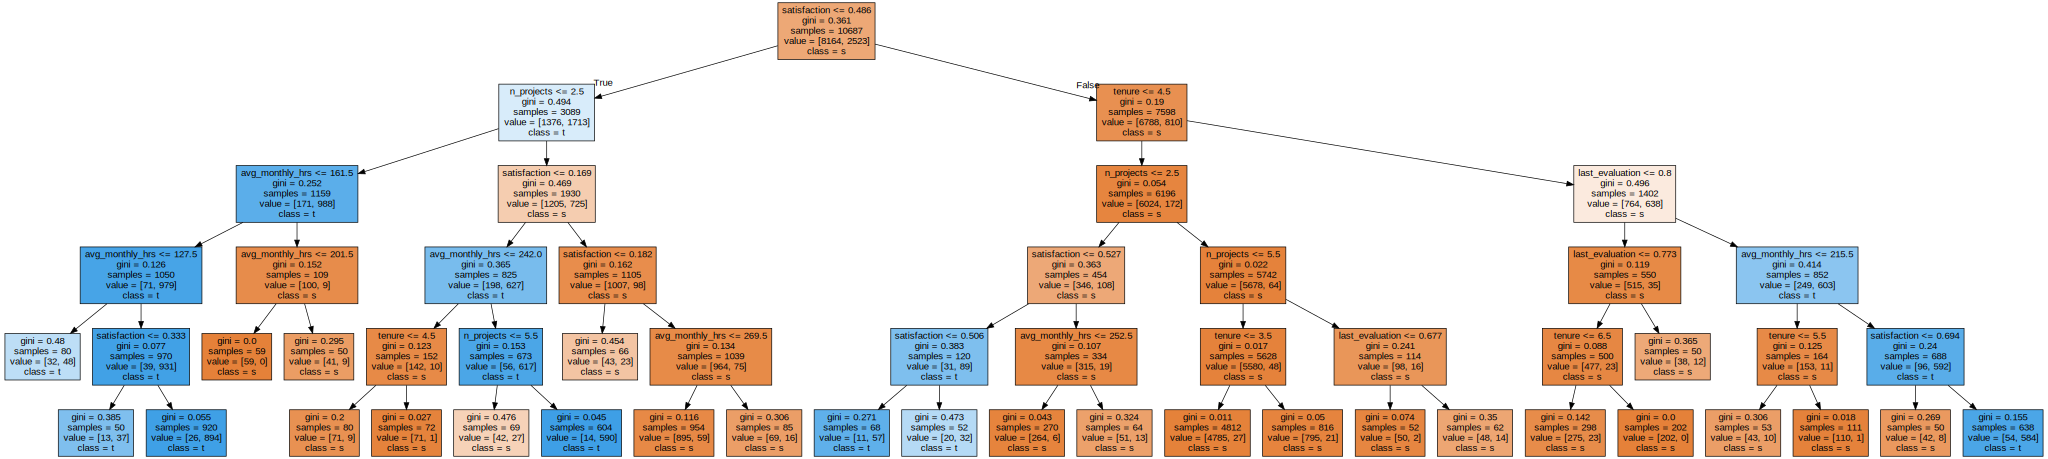

In [25]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(gini_tree, out_file=None,
                                feature_names=featuresf,
                                class_names=targetf,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

Depth of the tree for Gini Impurity is 5

The highly influential features from the tree are satisfaction, tenure, projects and promotion

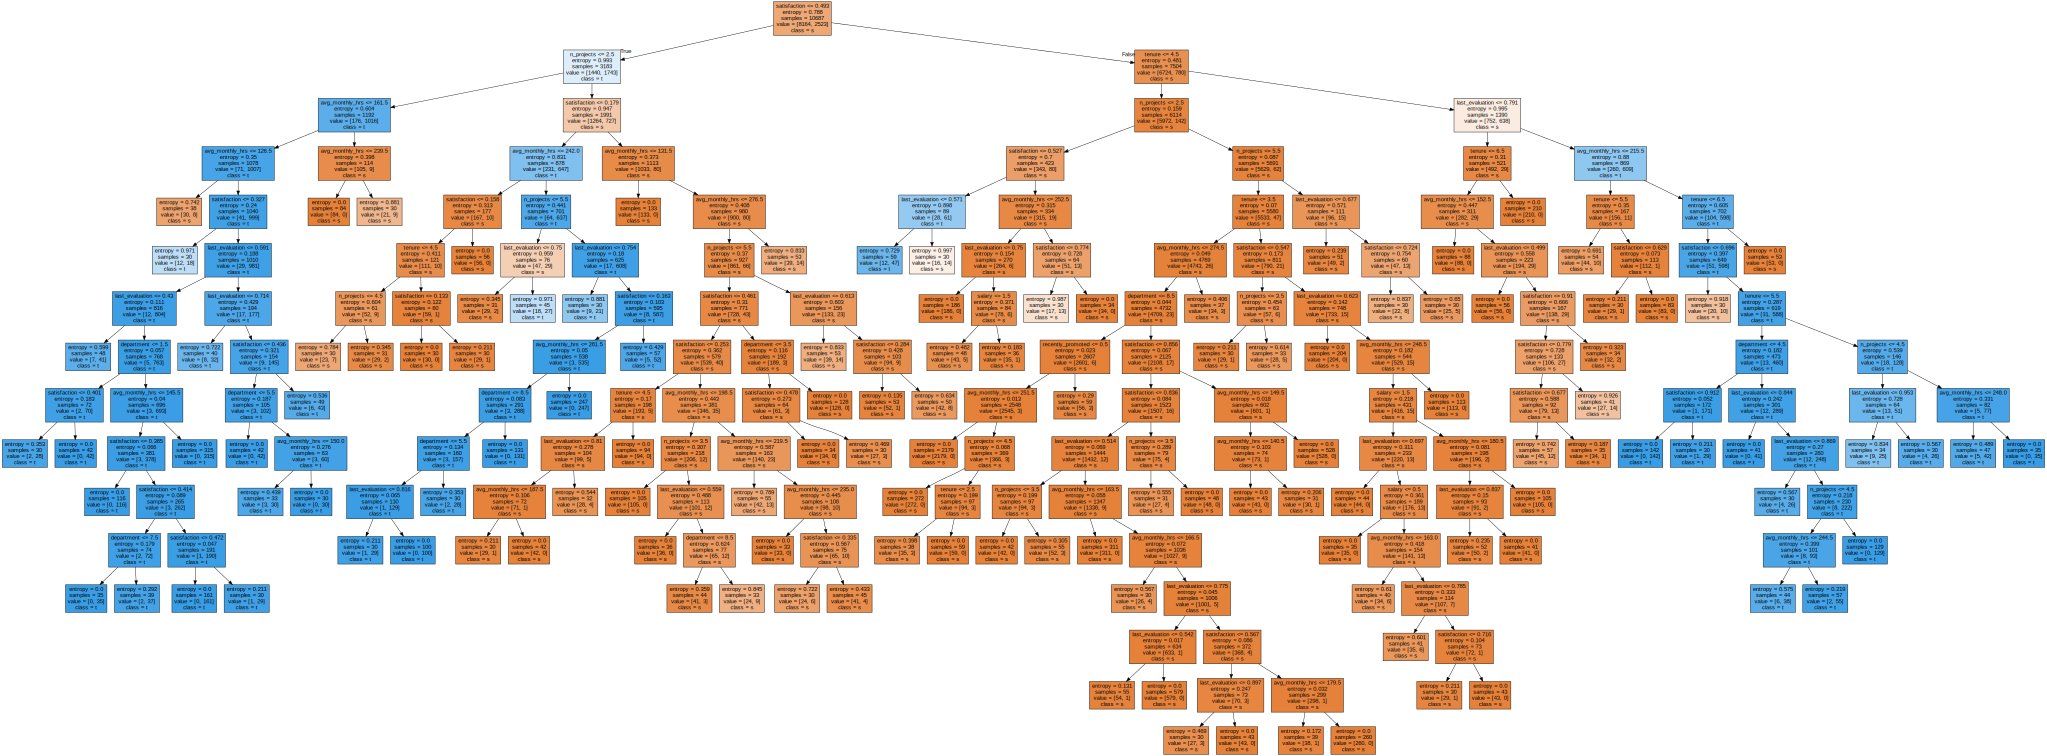

In [40]:
# DOT data
dot_data = tree.export_graphviz(entropy_tree, out_file=None,
                                feature_names=featuresf,
                                class_names=targetf,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [29]:
graph.render("decision_tree")

'decision_tree.png'

Experimenting with different depth parameters for Gini and Entropy Trees

In [33]:
from matplotlib.axis import GRIDLINE_INTERPOLATION_STEPS
#pruning with different max_depth values
max_depth_values = [5, 10, 15, None]
best_gini_tree = None
best_gini_score = 0

for max_depth in max_depth_values:
    gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=50)
    gini_tree.fit(X_train, Y_train)
    accuracy = gini_tree.score(X_test, Y_test)

    if accuracy > best_gini_score:
        gini_depth_score = max_depth
        best_gini_score = accuracy
        best_gini_tree = gini_tree

print("Best Gini Tree Validation Accuracy:", best_gini_score)
print("Best Depth value:", gini_depth_score)

Best Gini Tree Validation Accuracy: 0.9588323353293413
Best Depth value: 5


In [34]:
#pruning with different max_depth values
best_entropy_tree = None
best_entropy_score = 0

for max_depth in max_depth_values:
    entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=30)
    entropy_tree.fit(X_train, Y_train)
    accuracy = entropy_tree.score(X_test, Y_test)

    if accuracy > best_entropy_score:
        entro_depth_score = max_depth
        best_entropy_score = accuracy
        best_entropy_tree = entropy_tree

print("Best Entropy Tree Validation Accuracy:", best_entropy_score)
print("Best Depth value:", entro_depth_score)

Best Entropy Tree Validation Accuracy: 0.9670658682634731
Best Depth value: 5


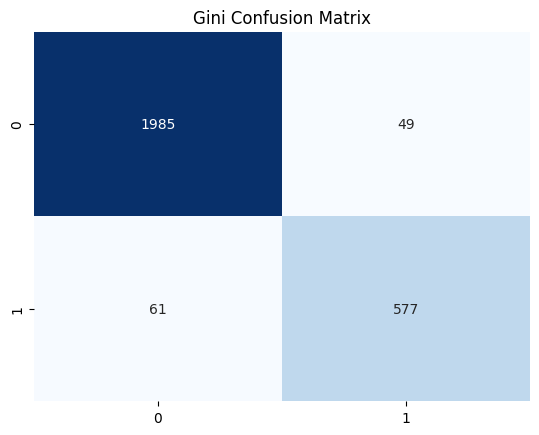

In [36]:
# Plot confusion matrices
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, y_pred_gini),
            annot=True, cbar=False, cmap='Blues',
            fmt='d')
plt.title('Gini Confusion Matrix')

plt.show()

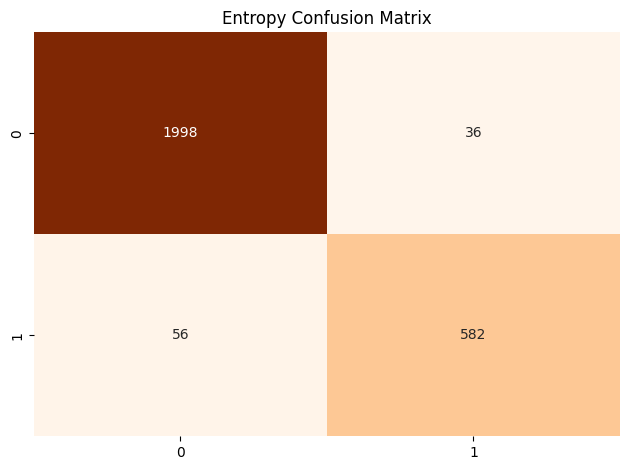

In [37]:
sns.heatmap(confusion_matrix(Y_test, y_pred_entropy),
            annot=True, cbar=False, cmap='Oranges',
            fmt='d')
plt.title('Entropy Confusion Matrix')

plt.tight_layout()
plt.show()

Feature Importance Visualisation

In [38]:
# Feature Importances
importances_gini = gini_tree.feature_importances_
importances_entropy = entropy_tree.feature_importances_
features = X.columns

# Sorting features by importance
sorted_importances_gini = sorted(zip(features, importances_gini), key=lambda x: x[1], reverse=True)
sorted_importances_entropy = sorted(zip(features, importances_entropy), key=lambda x: x[1], reverse=True)


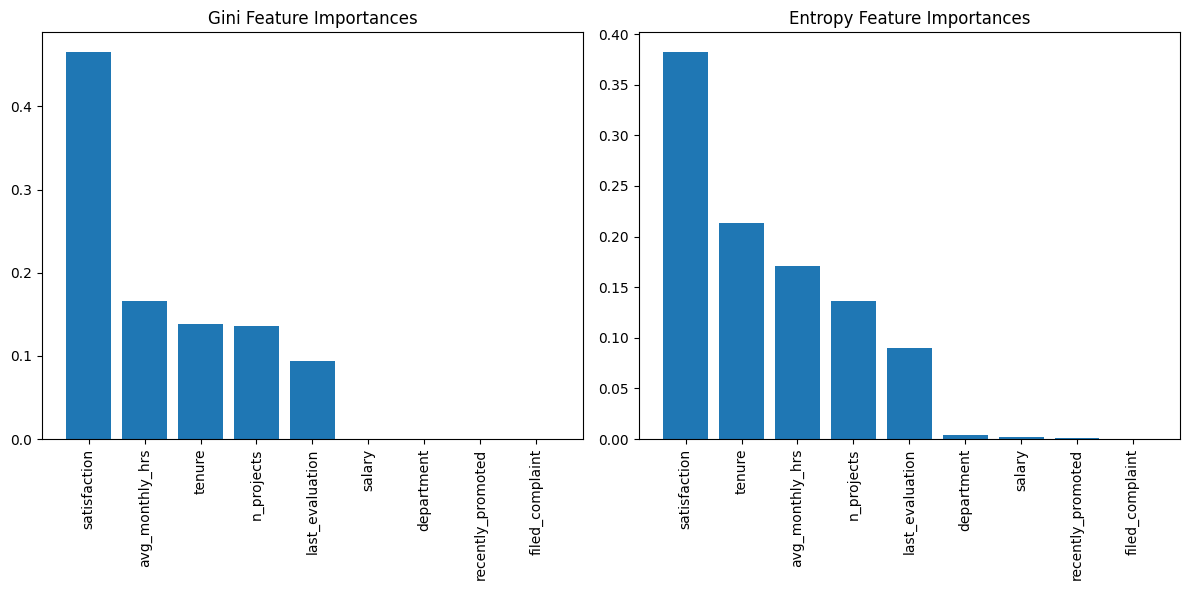

In [39]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(*zip(*sorted_importances_gini))
plt.title('Gini Feature Importances')
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(*zip(*sorted_importances_entropy))
plt.title('Entropy Feature Importances')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()